# Procesamiento de Imágenes - UNS - Doctorado¶

Trabajo Práctico 2 - Aritmética de Pixels

In [1]:
# load and display an image with Matplotlib
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


from matplotlib.widgets import Slider

In [2]:
class ImageOperation:
    
    def __init__(self, image1, image2):

        ''' Store images in the class constructor '''
        
        self.image1 = image1
        
        self.image2 = image2

    def suma_clamp_rgb(self):

        ''' Clamped sum in RGB '''

        heigth, width, channels = self.image1.shape

        new_image = np.zeros(self.image1.shape)

        for i in range(heigth):
    
            for j in range(width):

                r1, g1, b1 = self.image1[i, j]

                r2, g2, b2 = self.image2[i, j]

                new_image[i, j] = [1 if r1 + r2 > 1 else r1 + r2, 1 if g1 + g2 > 1 else g1 + g2, 1 if b1 + b2 > 1 else b1 + b2]

        plt.imshow(new_image)
        plt.axis("off")
        plt.show()
        
    def suma_prom_rgb(self):

        ''' Averaged sum in RGB '''        

        heigth, width, channels = self.image1.shape

        new_image = np.zeros(self.image1.shape)

        for i in range(heigth):
    
            for j in range(width):

                r1, g1, b1 = self.image1[i, j]

                r2, g2, b2 = self.image2[i, j]

                new_image[i, j] = [(r1 + r2) / 2, (g1 + g2) / 2, (r1 + r2) / 2]

        plt.imshow(new_image)
        plt.axis("off")
        plt.show()

    def rgb_to_yiq(self, img):

        ''' RGB to YIQ '''

        modified_img = np.copy(img)

        heigth, width, channels = modified_img.shape

        for i in range(heigth):
    
            for j in range(width):

                r, g, b = modified_img[i, j]

                change_y = 0.299 * r + 0.587 * g + 0.114 * b
                change_i = 0.595716 * r - 0.274453 * g - 0.321263 * b
                change_q = 0.211456 * r - 0.522591 * g + 0.311135 * b

                modified_img[i, j] = [change_y, change_i + 0.5, change_q + 0.5]  
                
        return modified_img

    def yiq_to_rgb(self, img):

        ''' YIQ to RGB '''

        modified_img = np.copy(img)

        heigth, width, channels = modified_img.shape

        for a in range(heigth):
    
            for b in range(width):
                
                y, i, q = modified_img[a, b]
        
                i -= 0.5
                q -= 0.5
        
                change_r = y + 0.9663 * i + 0.6210 * q
        
                change_g = y - 0.2721 * i - 0.6474 * q
        
                change_b = y - 1.1070 * i + 1.7046 * q        
                
                modified_img[a, b] = [change_r, change_g, change_b]
                
        return modified_img

    def suma_yiq_clamp(self):

        ''' Clamped sum in YIQ '''

        img1 = self.image1

        img2 = self.image2

        heigth, width, channels = self.image1.shape

        new_image = np.zeros(self.image1.shape)

        modified_img1 = self.rgb_to_yiq(img1)

        modified_img2 = self.rgb_to_yiq(img2)

        for i in range(heigth):
    
            for j in range(width):

                y1, i1, q1 = modified_img1[i, j]

                y2, i2, q2 = modified_img2[i, j]                

                y3 = 1 if y1 + y2 > 1 else y1 + y2

                i3 = ((y1 * i1) + (y2 * i2)) / (y1 + y2)

                q3 = ((y1 * q1) + (y2 * q2)) / (y1 + y2)

                new_image[i, j] = [y3, i3, q3]                

        new_image = self.yiq_to_rgb(new_image)

        new_image = np.clip(new_image, 0, 1)

        plt.imshow(new_image)
        plt.axis("off")
        plt.show()
    
    def suma_yiq_prom(self):

        ''' Average sum in YIQ '''

        img1 = self.image1

        img2 = self.image2

        heigth, width, channels = self.image1.shape

        new_image = np.zeros(self.image1.shape)

        modified_img1 = self.rgb_to_yiq(img1)

        modified_img2 = self.rgb_to_yiq(img2)

        for i in range(heigth):
    
            for j in range(width):

                y1, i1, q1 = modified_img1[i, j]

                y2, i2, q2 = modified_img2[i, j]

                y3 = (y1 + y2) / 2

                i3 = ((y1 * i1) + (y2 * i2)) / (y1 + y2)

                q3 = ((y1 * q1) + (y2 * q2)) / (y1 + y2)

                new_image[i, j] = [y3, i3, q3]                

        new_image = self.yiq_to_rgb(new_image)

        new_image = np.clip(new_image, 0, 1)

        plt.imshow(new_image)
        plt.axis("off")
        plt.show()

    def suma_if_ligther(self):

        img1 = self.image1

        img2 = self.image2

        heigth, width, channels = self.image1.shape

        new_image = np.zeros(self.image1.shape)

        modified_img1 = self.rgb_to_yiq(img1)

        modified_img2 = self.rgb_to_yiq(img2)

        for i in range(heigth):
    
            for j in range(width):

                y1, i1, q1 = modified_img1[i, j]

                y2, i2, q2 = modified_img2[i, j]

                y3 = y1 if y1 >= y2 else y2

                i3 = i1 if i1 >= i2 else i2

                q3 = q1 if q1 >= q2 else q2

                new_image[i, j] = [y3, i3, q3]                

        new_image = self.yiq_to_rgb(new_image)

        new_image = np.clip(new_image, 0, 1)

        plt.imshow(new_image)
        plt.axis("off")
        plt.show()

    def resta_if_darker(self):

        img1 = self.image1

        img2 = self.image2

        heigth, width, channels = self.image1.shape

        new_image = np.zeros(self.image1.shape)

        modified_img1 = self.rgb_to_yiq(img1)

        modified_img2 = self.rgb_to_yiq(img2)

        for i in range(heigth):
    
            for j in range(width):

                y1, i1, q1 = modified_img1[i, j]

                y2, i2, q2 = modified_img2[i, j]

                y3 = y1 if y1 <= y2 else y2

                i3 = i1 if i1 <= i2 else i2

                q3 = q1 if q1 <= q2 else q2

                new_image[i, j] = [y3, i3, q3]                

        new_image = self.yiq_to_rgb(new_image)

        new_image = np.clip(new_image, 0, 1)

        plt.imshow(new_image)
        plt.axis("off")
        plt.show()  

    
    def resta_clamp(self):
    
        img1 = self.image1

        img2 = self.image2

        heigth, width, channels = self.image1.shape

        new_image = np.zeros(self.image1.shape)

        for i in range(heigth):
    
            for j in range(width):

                r1, g1, b1 = img1[i, j]

                r2, g2, b2 = img2[i, j]

                r3 = r1 - r2

                g3 = g1 - g2

                b3 = b1 - b2

                new_image[i, j] = [r3, g3, b3]                

        new_image = np.clip(new_image, 0, 1)

        plt.imshow(new_image)
        plt.axis("off")
        plt.show()

    def resta_prom(self):
    
        img1 = self.image1

        img2 = self.image2

        heigth, width, channels = self.image1.shape

        new_image = np.zeros(self.image1.shape)

        for i in range(heigth):
    
            for j in range(width):

                r1, g1, b1 = img1[i, j]

                r2, g2, b2 = img2[i, j]

                rest3 = (r1 + r2) / 2

                gest3 = (g1 + g2) / 2

                best3 = (b1 + b2) / 2

                new_image[i, j] = [r1 - rest3, g1 - gest3, b2 - best3]                

        new_image = np.clip(new_image, 0, 1)

        plt.imshow(new_image)
        plt.axis("off")
        plt.show()

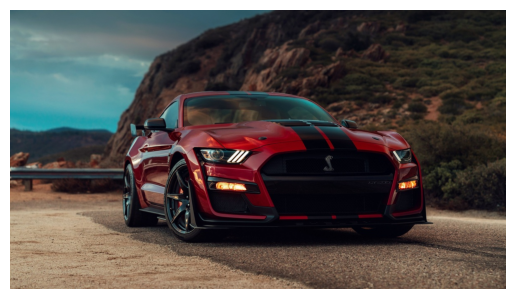

In [3]:
# load image as pixel array
# An image of a file opens
image = mpimg.imread(os.path.join(os.getcwd(), "images", "mustang.jpg")) / 255

plt.imshow(image)
plt.axis('off')  # Para desactivar los ejes en la visualización
plt.show()

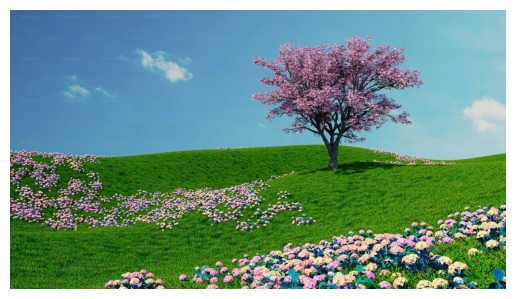

In [4]:
# load image as pixel array
# An image of a file opens
image2 = mpimg.imread(os.path.join(os.getcwd(), "images", "primavera.jpg")) / 255

plt.imshow(image2)
plt.axis('off')  # Para desactivar los ejes en la visualización
plt.show()

In [5]:
ops = ImageOperation(image, image2)

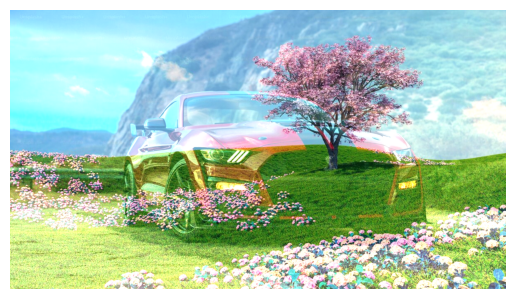

In [6]:
ops.suma_clamp_rgb()

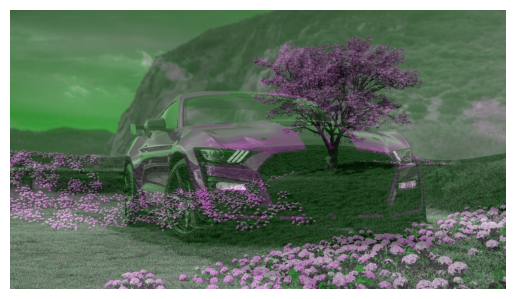

In [7]:
ops.suma_prom_rgb()

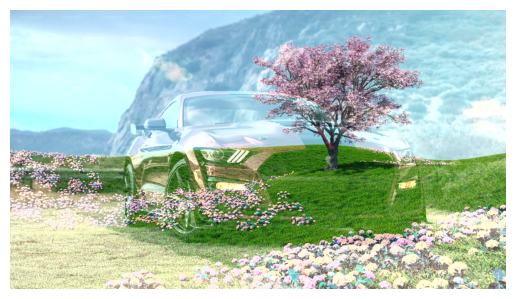

In [8]:
ops.suma_yiq_clamp()

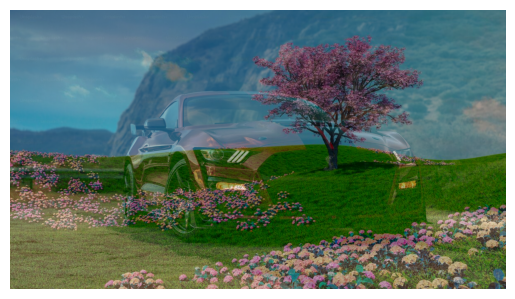

In [9]:
ops.suma_yiq_prom()

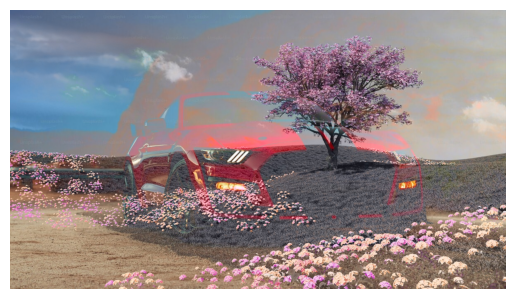

In [10]:
ops.suma_if_ligther()

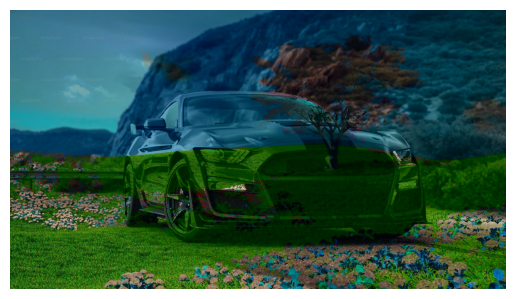

In [11]:
ops.resta_if_darker()

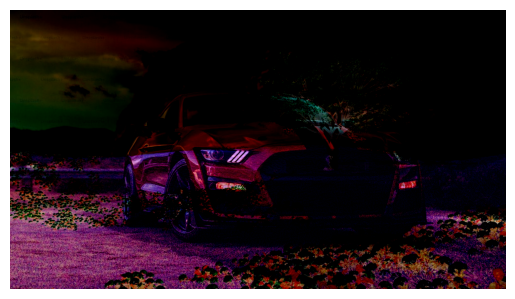

In [12]:
ops.resta_clamp()

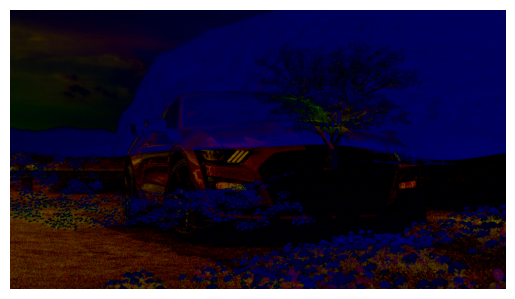

In [13]:
ops.resta_prom()